
###  <span style="font-family: Calibri; font-size:1.3 em;color:#000055"> MLS Case Study: Amazon Fine Food Reviews </span>


###  <span style="font-family: Calibri; font-size:1.3 em;color:#000055"> Context </span>


- This dataset consists of reviews of fine foods from amazon.
- The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include a plain text review.
- It also includes reviews from all other Amazon categories.

###  <span style="font-family: Calibri; font-size:1.3 em;color:#000055"> Data includes:</span>

1. Reviews from Oct 1999 - Oct 2012
2. 568,454 reviews
3. 256,059 users
4. 74,258 products
5. 260 users with > 50 reviews

The purpose of this analysis is to make up a prediction model where we will be able to predict whether a recommendation is positive or negative. In this analysis, we will focus the positive/negative sentiment of the recommendation.

In [1]:
# install and import necessary libraries.

# !pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

# nltk.download('stopwords')                              # Download Stopwords.
# nltk.download('punkt')
# nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.

###  <span style="font-family: Calibri; font-size:1.3 em;color:#000055"> Data Loading </span>

In [2]:
data = pd.read_csv("Reviews.csv")

In [3]:
data.shape                                               # print shape of data.

(568454, 10)

In [4]:
data.head()                                              # Print first 5 rows of data.

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


###  <span style="font-family: Calibri; font-size:1.3 em;color:#000055"> Subsetting Data: # Taking only 10000 entries for demonstration purpose. As full data will take more time to process. # Only keeping score and Text columns from the data, as these are useful for our analysis.
 </span>

In [5]:
data = data.loc[:10000, ['Score', 'Text']] #-----Extracting 10K records from the data

In [6]:
data.isnull().sum(axis=0)

Score    0
Text     0
dtype: int64

In [7]:
pd.set_option('display.max_colwidth', None)
data.head()

,Score,Text
0,5,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.
1,1,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
2,4,"This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch."
3,2,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.
4,5,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."


In [8]:
data.shape                                # Shape of data

(10001, 2)

###  <span style="font-family: Calibri; font-size:1.3 em;color:#000055"> Class Balance </span>

In [9]:
data['Score'].value_counts()

5    6184
4    1433
1     932
3     862
2     590
Name: Score, dtype: int64

###  <span style="font-family: Calibri; font-size:1.3 em;color:#000055"> Data Pre-processing </span>


- Remove html tags.
- language check
- Replace contractions in string. (e.g. replace I'm --> I am) and so on.\
- Remove numbers
- Remove proper nouns
- Tokenization
- To remove Stopwords.
- Lemmatized data

We have used NLTK library to tokenize words , remove stopwords and lemmatize the remaining words.

###  <span style="font-family: Calibri; font-size:1.3 em;color:#000055"> Language Check </span>

In [10]:
# from langdetect import detect

# data['Language'] = ""

# for i, desc in enumerate(data['Text']):
#     try:
#         data['Language'][i] = detect(desc)
#     except:
#         data['Language'][i] = 'unknown'

In [11]:
# data.head()

In [12]:
# data['Language'].value_counts()

In [13]:
# data=data[data['Language']=='en']

###  <span style="font-family: Calibri; font-size:1.3 em;color:#000055"> HTTP/HyperLink Removal </span>

In [14]:
# Removal of the http link using Regular Expression.

for i, row in data.iterrows():

    #     print(i,row)
    
    clean_text = re.sub(r"http\S+", "", data.at[i, 'Text']) #--Extracting anything that follows http till a space is encountered
    
    data.at[i,'Text'] = clean_text #---Puts the cleaned text back to the data frame
    
data.head()

,Score,Text
0,5,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.
1,1,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
2,4,"This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch."
3,2,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.
4,5,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."


###  <span style="font-family: Calibri; font-size:1.3 em;color:#000055"> HTML Removal </span>

In [15]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

data['Text'] = data['Text'].apply(lambda x: strip_html(x))
data.head()

,Score,Text
0,5,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.
1,1,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
2,4,"This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch."
3,2,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.
4,5,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."


###  <span style="font-family: Calibri; font-size:1.3 em;color:#000055"> Contraction </span>

In [16]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

data['Text'] = data['Text'].apply(lambda x: replace_contractions(x))
data.head()

,Score,Text
0,5,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.
1,1,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
2,4,"This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch."
3,2,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.
4,5,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."


###  <span style="font-family: Calibri; font-size:1.3 em;color:#000055"> Numbers Removal </span>

In [17]:
def remove_numbers(text):
    text = re.sub(r'\d+', '', text)
    return text

data['Text'] = data['Text'].apply(lambda x: remove_numbers(x))
data.head()

,Score,Text
0,5,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.
1,1,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
2,4,"This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch."
3,2,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.
4,5,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."


###  <span style="font-family: Calibri; font-size:1.3 em;color:#000055"> Removing Proper Noun </span>
https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

In [18]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\91905\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [19]:
sentence="Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."

sentence.split()

['Great',
 'taffy',
 'at',
 'a',
 'great',
 'price.',
 'There',
 'was',
 'a',
 'wide',
 'assortment',
 'of',
 'yummy',
 'taffy.',
 'Delivery',
 'was',
 'very',
 'quick.',
 'If',
 'your',
 'a',
 'taffy',
 'lover,',
 'this',
 'is',
 'a',
 'deal.']

In [20]:
for i, row in data.iterrows():
    
    sentence=data.at[i,'Text']
    
    tagged_sentence = nltk.tag.pos_tag(sentence.split())
    
    edited_sentence = [word for word,tag in tagged_sentence if tag != 'NNP' and tag != 'NNPS']
    
    data.at[i,'Text']=(' '.join(edited_sentence))
    
data.head()

,Score,Text
0,5,I have bought several of the canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. is finicky and she appreciates this product better than most.
1,1,"arrived labeled as Salted peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
2,4,"This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of The and The - this is the treat that seduces into selling out his Brother and to the"
3,2,If you are looking for the secret ingredient in I believe I have found it. I got this in addition to the I ordered was good) and made some cherry soda. The flavor is very medicinal.
4,5,"taffy at a great price. There was a wide assortment of yummy taffy. was very quick. If your a taffy lover, this is a deal."


###  <span style="font-family: Calibri; font-size:1.3 em;color:#000055"> Tokenization </span>

In [21]:
data['Text'] = data.apply(lambda row: nltk.word_tokenize(row['Text']), axis=1) # Tokenization of data

In [22]:
data.head()                                                                    # Look at how tokenized data looks.

,Score,Text
0,5,"[I, have, bought, several, of, the, canned, dog, food, products, and, have, found, them, all, to, be, of, good, quality, ., The, product, looks, more, like, a, stew, than, a, processed, meat, and, it, smells, better, ., is, finicky, and, she, appreciates, this, product, better, than, most, .]"
1,1,"[arrived, labeled, as, Salted, peanuts, were, actually, small, sized, unsalted, ., Not, sure, if, this, was, an, error, or, if, the, vendor, intended, to, represent, the, product, as, ``, Jumbo, '', .]"
2,4,"[This, is, a, confection, that, has, been, around, a, few, centuries, ., It, is, a, light, ,, pillowy, citrus, gelatin, with, nuts, -, in, this, case, And, it, is, cut, into, tiny, squares, and, then, liberally, coated, with, powdered, sugar, ., And, it, is, a, tiny, mouthful, of, heaven, ., Not, too, chewy, ,, and, very, flavorful, ., I, highly, recommend, this, yummy, treat, ., If, you, are, familiar, with, the, story, of, The, and, The, -, this, is, the, treat, that, seduces, into, selling, out, his, Brother, and, to, the]"
3,2,"[If, you, are, looking, for, the, secret, ingredient, in, I, believe, I, have, found, it, ., I, got, this, in, addition, to, the, I, ordered, was, good, ), and, made, some, cherry, soda, ., The, flavor, is, very, medicinal, .]"
4,5,"[taffy, at, a, great, price, ., There, was, a, wide, assortment, of, yummy, taffy, ., was, very, quick, ., If, your, a, taffy, lover, ,, this, is, a, deal, .]"


###  <span style="font-family: Calibri; font-size:1.3 em;color:#000055"> Stopwords Removal </span>

In [23]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))                              

In [24]:
print(stopwords)

['did', 'be', 'now', 'through', 'am', 'm', 'hers', 'but', 'are', 'any', 'that', 'as', 'than', 'of', "don't", 'while', 'were', 'out', 'what', "you're", 'o', 'most', "she's", 'by', 've', 'only', 'when', 'no', 'me', 'because', 'other', 'you', 'doing', 'these', 'whom', 'both', 'very', 'why', 'been', 'just', 'ours', 'how', 'own', 's', 'our', 'at', 'themselves', 're', 'we', 'was', 'in', 'same', 'an', 'y', 'being', 'where', "you'd", 'there', 'don', 'after', 'has', 'to', 'this', 'with', 'aren', 'those', 'or', 'then', 'theirs', 'more', 'will', 'her', 'which', 'such', 'it', 'before', 'about', 'all', "should've", 'himself', 'too', 'off', 'yours', 'if', 'should', 'each', 'and', 'under', 'between', 'had', 'do', 'below', 'the', 'above', 'his', 'again', 'they', 'my', "you've", 'who', 'nor', 'further', 'here', 'yourselves', 'he', 'have', 'yourself', 'against', "you'll", 'its', "it's", 'myself', "that'll", 'd', 'i', 'once', 'is', 'from', 'couldn', 'ourselves', 'their', 'so', 'during', 'him', 'down', 'c

###  <span style="font-family: Calibri; font-size:1.3 em;color:#000055"> Normalize Text </span>

In [25]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['Text'] = data.apply(lambda row: normalize(row['Text']), axis=1)
data.head()

,Score,Text
0,5,buy several can dog food products find good quality product look like stew process meat smell better finicky appreciate product better
1,1,arrive label salt peanuts actually small size unsalted not sure error vendor intend represent product jumbo
2,4,confection around centuries light pillowy citrus gelatin nut case cut tiny square liberally coat powder sugar tiny mouthful heaven not chewy flavorful highly recommend yummy treat familiar story treat seduce sell brother
3,2,look secret ingredient believe find get addition order good make cherry soda flavor medicinal
4,5,taffy great price wide assortment yummy taffy quick taffy lover deal


###  <span style="font-family: Calibri; font-size:1.3 em;color:#000055"> Model Development: Count Vectorize </span>

Count vectorize uses an array of texts. Note that the text above is present in form of a string and not tokens. When such texts are passed to the data, the text has to be tokenized. Hence one can use the ``tokenizer`` option or the ``token_pattern`` option to tokenize the text. The deafault token pattern removes and extracts words based on white space and punctuations.

``Max Features:`` If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.

In [26]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=2000, ngram_range=(1,2))                # Keep only 1000 features as number of features will increase the processing time.

data_features = vectorizer.fit_transform(data['Text'])

data_feature = data_features.toarray()                        # Convert the data features to array.

In [27]:
data_feature

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [28]:
print(vectorizer.vocabulary_) #--------------Top features (identified from the data)

{'buy': 198, 'several': 1552, 'can': 217, 'dog': 465, 'food': 641, 'products': 1384, 'find': 596, 'good': 710, 'quality': 1400, 'product': 1376, 'look': 977, 'like': 934, 'process': 1374, 'meat': 1039, 'smell': 1591, 'better': 139, 'appreciate': 79, 'dog food': 466, 'find good': 597, 'good quality': 719, 'quality product': 1401, 'look like': 979, 'arrive': 83, 'label': 899, 'salt': 1509, 'peanuts': 1288, 'actually': 10, 'small': 1587, 'size': 1579, 'not': 1121, 'sure': 1704, 'vendor': 1887, 'not sure': 1177, 'around': 82, 'light': 931, 'citrus': 285, 'nut': 1194, 'case': 235, 'cut': 395, 'tiny': 1794, 'square': 1640, 'coat': 293, 'powder': 1348, 'sugar': 1688, 'chewy': 262, 'flavorful': 630, 'highly': 800, 'recommend': 1446, 'yummy': 1998, 'treat': 1820, 'sell': 1540, 'brother': 186, 'highly recommend': 801, 'ingredient': 854, 'believe': 130, 'get': 685, 'addition': 16, 'order': 1241, 'make': 1010, 'cherry': 260, 'soda': 1601, 'flavor': 619, 'great': 737, 'price': 1365, 'quick': 1404, 

In [29]:
count_vect_df = pd.DataFrame(data_features.todense(), columns=vectorizer.get_feature_names())
count_vect_df.head()

,able,able find,absolute,absolutely,absolutely love,accord,acid,acidic,across,actual,...,years ago,yeast,yellow,yes,yet,yogurt,young,yum,yummy,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [30]:
from nltk import word_tokenize 
from nltk.util import ngrams


text = ['Monish cooked fish today']
for line in text:
    token = nltk.word_tokenize(line)
    bigram = list(ngrams(token, 2)) 

    print(bigram)

[('Monish', 'cooked'), ('cooked', 'fish'), ('fish', 'today')]


In [31]:
data_features.shape

(10001, 2000)

In [32]:
# print(data_feature[3])

In [33]:
labels = data['Score']
labels = labels.astype('int')

In [34]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_feature, labels, test_size=0.3, random_state=42)

In [35]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4, class_weight='balanced', random_state=7)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(class_weight='balanced', n_estimators=10, n_jobs=4,
                       random_state=7)
0.6597390609390609


In [36]:
# Predict the result for test data using the model built above.

result = forest.predict(X_test)

[[ 110    9    6    9  180]
 [  24   26    5    6  106]
 [  20    6   44   18  147]
 [  13    5   15   61  316]
 [  43   15   16   50 1751]]


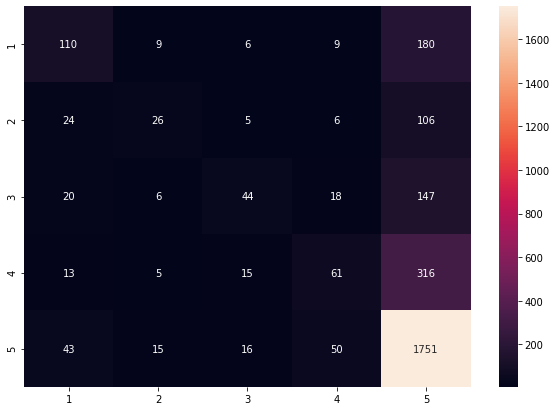

In [37]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

%matplotlib inline

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "12345"],
                  columns = [i for i in "12345"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')



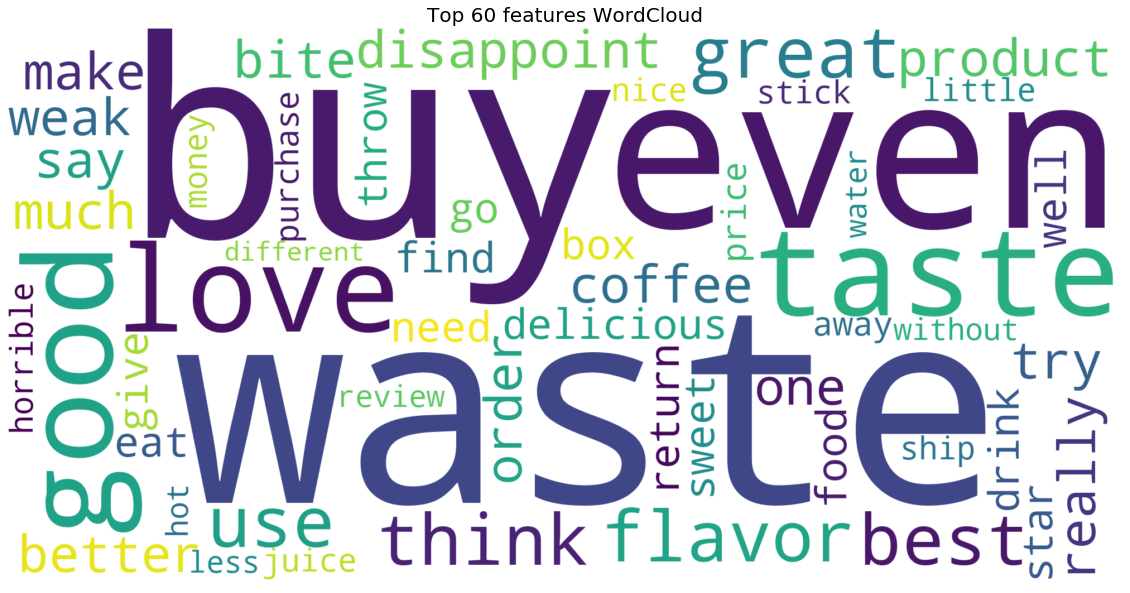

In [38]:
all_features = vectorizer.get_feature_names()              #Instantiate the feature from the vectorizer

top_features=''                                            # Addition of top 40 feature into top_feature after training the model

feat=forest.feature_importances_

features=np.argsort(feat)[::-1]

for i in features[0:60]:
    
    top_features+=all_features[i]
    
    top_features+=','
    
# print(top_features)  

print(" ") 

print(" ")     

from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000, random_state=7).generate(top_features)

# Display the generated image:

plt.figure(figsize=(20, 15))

plt.imshow(wordcloud, interpolation='bilinear')

plt.title('Top 60 features WordCloud', fontsize=20)

plt.axis("off")

plt.show()

###  <span style="font-family: Calibri; font-size:1.3 em;color:#000055"> Model Development: TF*IDF </span>

In [39]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2000, ngram_range=(1,2))

data_features = vectorizer.fit_transform(data['Text'])

data_feature = data_features.toarray()

data_feature.shape

(10001, 2000)

In [40]:
data_feature

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.20406516,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [41]:
count_vect_df = pd.DataFrame(data_features.todense(), columns=vectorizer.get_feature_names())
count_vect_df.head()

,able,able find,absolute,absolutely,absolutely love,accord,acid,acidic,across,actual,...,years ago,yeast,yellow,yes,yet,yogurt,young,yum,yummy,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.204065,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.415900,0.0


In [42]:
X_train, X_test, y_train, y_test = train_test_split(data_feature, labels, test_size=0.3, random_state=42)

In [43]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_feature, labels, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.6688378621378621


In [44]:
result = forest.predict(X_test)

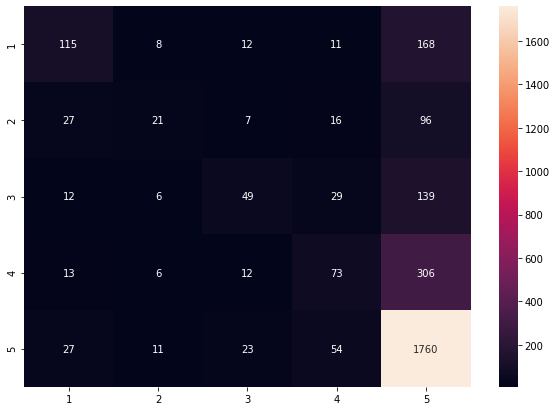

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "12345"],
                  columns = [i for i in "12345"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

###  <span style="font-family: Calibri; font-size:1.2em;color:#000055"> Using Word Embeddings from Pretrained Model - GLOVE</span>

The are multiple pre trained models present in the link below. We utilize "glove-twitter-25" since we are dealing with tweets here. https://github.com/RaRe-Technologies/gensim-data

In [46]:
# !pip install gensim

import gensim

import gensim.downloader as api

print(api.load("glove-twitter-50", return_path=True))

C:\Users\91905\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


C:\Users\91905/gensim-data\glove-twitter-50\glove-twitter-50.gz


In [47]:
#----------------------------Load word2vec model (trained on an enormous Twitter corpus)

model = gensim.models.KeyedVectors.load_word2vec_format('C:\\Users\\91905\\gensim-data\\glove-twitter-50\\glove-twitter-50.gz')

#----------------------------Check dimension of word vectors------------

model.vector_size

50

In [53]:
print("-"*70)
print("Generating Word Embeddings for 'airlines'")
print("-"*70)

word_vec = model['airlines'] #-------------Vectors are word embeddings here

print("Vectors:")
print()
print(word_vec)
print("-"*70)

print("Length:", len(word_vec))

----------------------------------------------------------------------
Generating Word Embeddings for 'airlines'
----------------------------------------------------------------------
Vectors:

[-0.62772   1.1525   -0.89168  -0.14048  -1.0866    0.15556  -0.35658
 -0.65174   1.4524   -0.87372  -0.27778  -0.44685  -2.121     0.88973
  1.568    -0.23613  -0.79586   0.25713   0.82242  -0.31703  -0.16962
 -1.2239   -0.31986  -0.97578  -0.34564   0.173    -0.67145  -0.5614
  0.3857   -0.4394   -0.16914  -0.54917   0.82243  -0.2417    1.2237
  0.51122  -0.092987  0.25243  -0.060347 -0.38518  -0.18553   0.094037
 -0.19202  -0.5617   -0.35862   0.49092  -0.32825  -0.44347   0.52119
  1.0414  ]
----------------------------------------------------------------------
Length: 50


In [54]:
def document_vector(word2vec_model, doc):
    
    #-------------------------remove out-of-vocabulary words-------------------------
    
    doc = [word for word in doc if word in model.key_to_index]
    
    return np.mean(model[doc], axis=0)


def has_vector_representation(word2vec_model, doc):
    
    """
    Check if at least one word of the document is in the word2vec dictionary. function allows us to drop documents without
    any word in word2vector.
    """
    return not all(word not in word2vec_model.key_to_index for word in doc)


def filter_docs(corpus, texts, condition_on_doc):
    """
    Filter corpus and texts given the function condition_on_doc which takes a doc. The document doc is kept if condition_on_doc(doc) is true.
    """
    number_of_docs = len(corpus)

    if texts is not None:
        texts = [text for (text, doc) in zip(texts, corpus)
                 if condition_on_doc(doc)]

    corpus = [doc for doc in corpus if condition_on_doc(doc)]

    print("{} docs removed".format(number_of_docs - len(corpus)))

    return (corpus, texts)

In [55]:
data.head()

,Score,Text
0,5,buy several can dog food products find good quality product look like stew process meat smell better finicky appreciate product better
1,1,arrive label salt peanuts actually small size unsalted not sure error vendor intend represent product jumbo
2,4,confection around centuries light pillowy citrus gelatin nut case cut tiny square liberally coat powder sugar tiny mouthful heaven not chewy flavorful highly recommend yummy treat familiar story treat seduce sell brother
3,2,look secret ingredient believe find get addition order good make cherry soda flavor medicinal
4,5,taffy great price wide assortment yummy taffy quick taffy lover deal


In [56]:
corpus = list(data['Text'])

Score=list(data['Score'])

print(corpus[:5])

['buy several can dog food products find good quality product look like stew process meat smell better finicky appreciate product better', 'arrive label salt peanuts actually small size unsalted not sure error vendor intend represent product jumbo', 'confection around centuries light pillowy citrus gelatin nut case cut tiny square liberally coat powder sugar tiny mouthful heaven not chewy flavorful highly recommend yummy treat familiar story treat seduce sell brother', 'look secret ingredient believe find get addition order good make cherry soda flavor medicinal', 'taffy great price wide assortment yummy taffy quick taffy lover deal']


In [57]:
#----------------------Remove tweets that don't include any words in W2V's vocab

corpus, titles_list = filter_docs(corpus, Score, lambda doc: has_vector_representation(model, doc))

#----------------------Filter Tweets without a single word in the model--------------------------

corpus, titles_list = filter_docs(corpus, Score, lambda doc: (len(doc) != 0))

x = []

for doc in corpus: # append the vector for each document
    x.append(document_vector(model, doc))
    
X = np.array(x) # list to array

8 docs removed
0 docs removed


In [58]:
embeddings=pd.DataFrame(X)
embeddings.shape

(9993, 50)

In [59]:
embeddings.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.271695,0.121688,0.153235,-0.120249,-0.121117,-0.024753,-0.620186,0.114176,0.078808,0.408421,...,-2.710075,0.309478,0.291156,-0.289676,-0.162212,-0.029988,0.066481,-0.463742,0.141831,-0.777831
1,0.248648,0.066332,0.185096,-0.082939,-0.071746,-0.008843,-0.634377,0.137475,0.047880,0.430548,...,-2.719522,0.259567,0.311071,-0.267861,-0.089546,-0.073599,0.146019,-0.537743,0.135133,-0.736322
2,0.224556,0.119204,0.082838,-0.088997,-0.114143,0.007341,-0.622505,0.124935,0.023886,0.461362,...,-2.628224,0.252563,0.364561,-0.205367,-0.062308,-0.083623,0.143902,-0.493947,0.128731,-0.743500
3,0.240568,0.088263,0.252549,-0.131268,-0.066481,-0.075213,-0.559964,0.039681,0.104086,0.511832,...,-2.716069,0.342346,0.227051,-0.275182,-0.165214,-0.012083,0.138616,-0.476662,0.021724,-0.772534
4,0.169556,0.210470,0.035334,-0.112154,-0.139233,0.029059,-0.670162,0.116563,-0.004911,0.312476,...,-2.633452,0.208066,0.407766,-0.239112,-0.055195,-0.036531,0.101874,-0.374032,0.135588,-0.828508


In [60]:
# print(titles_list)

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(embeddings, titles_list, test_size=0.3, random_state=42)

In [62]:
model_rf = RandomForestClassifier(max_samples=0.8, random_state=42)

model_rf.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.8, random_state=42)

In [63]:
model_rf.score(X_test,y_test)

0.6574382921947965

###  <span style="font-family: Calibri; font-size:1.3 em;color:#000055"> Optional </span>

###  <span style="font-family: Calibri; font-size:1.3 em;color:#000055"> Working With RNN (Recurring Neural Network)</span>

In [ ]:
data.head()

###  <span style="font-family: Calibri; font-size:1.3 em;color:#000055"> Methdology </span>

1. For RNN we don't use a CountVectorize() or a TF-IDF Matrix, we work with the original text
2. Text is tokenized and converted into sequences
3. The sequences needs to be padded to ensure that the tensor is of same size
4. Embedding and LSTM(Long Short Term Memory) layers are added
5. Model is compiled

https://medium.com/@hemantranvir/spam-detection-using-rnn-simplernn-lstm-with-step-by-step-explanation-530367608071

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential

In [ ]:
from sklearn.model_selection import train_test_split

text_corpus = data["Text"].tolist()
labels_corpus = data["Score"].tolist()

# Train and Test For Clean Description column
X_train, X_test, y_train, y_test = train_test_split(text_corpus, labels_corpus, test_size=0.2, random_state=40)

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer

In [ ]:
# finally, vectorize the text samples into a 2D integer tensor

tokenizer = Tokenizer(num_words=10000, char_level=False)

tokenizer.fit_on_texts(X_train)

sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

len(sequences_train)

In [ ]:
# pad sequences with 0s
X_train = pad_sequences(sequences_train, maxlen=1000)
X_test = pad_sequences(sequences_test, maxlen=1000)

print('Shape of data tensor:', X_train.shape)
print('Shape of data test tensor:', X_test.shape)
print(type(X_train))

In [ ]:
# Encode target variable
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder() 
y_train_lb = label_encoder.fit_transform(y_train)
y_test_lb = label_encoder.fit_transform(y_test)

In [ ]:
def create_model(maxlen,num_words,num_categories):
    
    model = Sequential()
    
    model.add(Embedding(num_words,output_dim=100,input_length=maxlen,trainable=True))
    
    model.add(BatchNormalization())
    
    model.add(Bidirectional(LSTM(100)))
    
    
    model.add(Dropout(0.3))
    
    model.add(Dense(128,activation='relu'))
    
    model.add(Dense(64,activation='relu'))
    
    model.add(Dense(32,activation='relu'))
    
    model.add(Dense(num_categories, activation='softmax'))
              
    model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

    model.summary()
    return model

In [ ]:
from tensorflow.keras.layers import BatchNormalization
model=create_model(1000,10000,5)

In [ ]:
history = model.fit(X_train, y_train_lb, epochs=5, validation_split=0.35)

Summary:

- We used dataset which has reviews in text format and their sentiment score on the scale of 1 to 5.
- The goal was to build a model for text-classification.
- We Pre-processed the data using variuos techniques and libraries.
- The pre-precessed data is converted to numbers, so that we can feed the data in the model.
- After building the classification model, we predicted the result for the test data.
- After that we saw that using the above techniques, our model performed good in perspective of how the text classification models perform.
- However, we can still increase the accuracy of our model by increasing the dataset we took into account for the model building (As the time was constraint here so we only used 50000 entries out of around 500000 entries, which means we built our model using 10% of dataset.)
- One more way to increase accuracy is to use different variations of Pre-processing techniques.